In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#path1= 'horseColicTraining.txt '
#path2 = 'horseColicTest.txt'
#data1=np.loadtxt(path1)
#data2=np.loadtxt(path2)
##提取数据和标签
#train_data  = data1[:, :-1]
#train_label = data1[:, -1]
#test_data = data2[: , :-1]
#test_label = data1[:, -1]
# 添加偏置项到训练数据中（在特征前添加一列全为1的列）
#train_data = np.c_[np.ones((train_data.shape[0], 1)), train_data]
#test_data = np.c_[np.ones((test_data.shape[0], 1)), test_data]

In [3]:
# 读取训练数据
with open('horseColicTraining.txt', 'r') as file:
    content = file.readlines()

train_array = np.array([line.strip().split() for line in content], dtype=float)
train_data = train_array[:, :-1]
train_label = train_array[:, -1]

# 在矩阵右侧添加一列全为1的列
train_data = np.hstack((train_data, np.ones((train_data.shape[0], 1))))

# 读取测试数据
with open('horseColicTest.txt', 'r') as file:
    content = file.readlines()

test_array = np.array([line.strip().split() for line in content], dtype=float)
test_data = test_array[:, :-1]
test_label = test_array[:, -1]

# 在测试数据中添加一列全为1的列
test_data = np.hstack((test_data, np.ones((test_data.shape[0], 1))))

In [4]:
plt.rcParams['font.sans-serif'] = ['SimHei']  #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  #用来正常显示负号

In [5]:
# 定义 sigmoid 函数
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [6]:
# 计算准确率
def calculate_accuracy(predictions, baseline_labels):
    correct_predictions = np.sum(predictions == baseline_labels)
    total_predictions = len(baseline_labels)
    accuracy = correct_predictions / total_predictions
    return accuracy

In [7]:
#梯度下降
weights = np.zeros(train_data.shape[1])
# 利用梯度下降进行求解
rate = 0.01  # 学习率
num_iterations = 100000  # 迭代次数
total = len(train_data) ** 2
for i in range(num_iterations):
    predictions = sigmoid(np.matmul(train_data,weights))
    gradient = np.matmul(train_data.T, (predictions - train_label)) / total
    weights -= rate * gradient
    #predictions = sigmoid(np.matmul(train_data, weights))
    #error = predictions - train_label
    #gradient = np.matmul(train_data.T , error)/total
    #weights += gradient * rate
    #w_gradient = np.dot(predictions ,(1 - predictions))
    # 计算梯度并更新权重
    #gradient = 2*np.dot(train_data.T, np.dot( error ,w_gradient)) / len(train_data)
    #weights += rate * gradient
 
# 在测试集上进行预测
predictions = sigmoid(np.matmul(weights, test_data.T))

# 将概率值转换为二分类标签（大于等于0.5的为1，小于0.5的为0）
predicted_labels = (predictions > 0.5).astype(int)
# 计算准确率
accuracy = calculate_accuracy(predicted_labels, test_label)
print(f'Accuracy: {accuracy * 100}%')

Accuracy: 77.61194029850746%


In [8]:

# 牛顿法更新权重
lr = 1.0
num_iterations = 100
for _ in range(num_iterations):
    predictions = sigmoid(np.dot(train_data, weights))
    error = train_label - predictions
    gradient = np.dot(train_data.T, error)
    hessian = np.dot(train_data.T, np.dot(np.diag(predictions), np.dot(np.diag(1 - predictions), train_data)))
    weights += lr * np.linalg.inv(hessian).dot(gradient)

# 在测试集上进行预测
predictions = sigmoid(np.dot(test_data, weights))

# 将概率值转换为二分类标签（大于等于0.5的为1，小于0.5的为0）
predicted_labels = (predictions >= 0.5).astype(int)

# 计算准确度
accuracy = np.mean(predicted_labels == test_label)
print(f'Accuracy: {accuracy * 100}%')

Accuracy: 71.64179104477611%


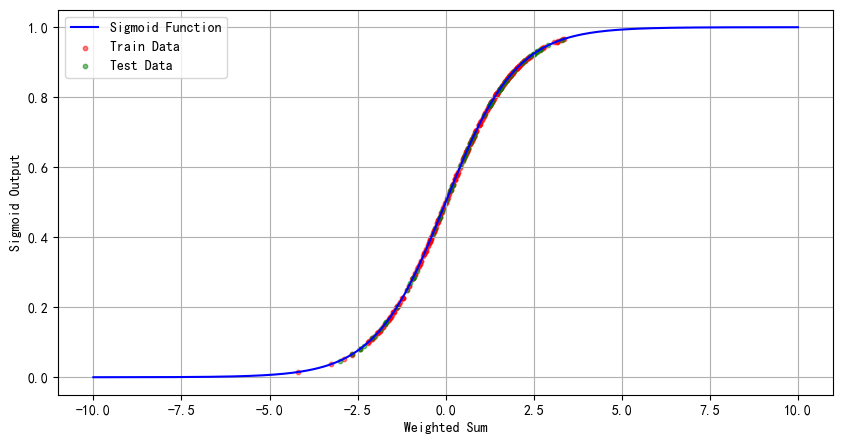

In [9]:
# 计算内积并通过sigmoid函数映射到[0, 1]区间
train_predictions = 1 / (1 + np.exp(-np.dot(train_data, weights)))
test_predictions = 1 / (1 + np.exp(-np.dot(test_data, weights)))

# 画出sigmoid函数的曲线
x = np.linspace(-10, 10, 1000)
sigmoid_curve = 1 / (1 + np.exp(-x))


# 画出训练数据和测试数据在sigmoid函数上的散点图，调整点的大小和透明度
plt.figure(figsize=(10, 5))
plt.plot(x, sigmoid_curve, label='Sigmoid Function', color='blue')
plt.scatter(np.dot(train_data, weights), train_predictions, label='Train Data', color='red', s=10, alpha=0.5)
plt.scatter(np.dot(test_data, weights), test_predictions, label='Test Data', color='green', s=10, alpha=0.5)
plt.xlabel('Weighted Sum')
plt.ylabel('Sigmoid Output')
plt.legend()
plt.grid(True)
plt.show()